In [40]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from geopy.geocoders import Nominatim # To get location informations
from geopy import distance

sns.set() # To set seaborn default theme

In [3]:
# Define path for all files
cities_path = 'data/cities.csv'
stations_path = 'data/stations.csv'
providers_path = 'data/providers.csv'
ticket_data_path = 'data/ticket_data.csv'

# Exploratory Data Analysis sur les differents datasets

## Cities

In [4]:
# Load the cities csv file
city_df = pd.read_csv(cities_path)

city_df

,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN
...,...,...,...,...,...,...
8035,9964,"Saint-André-lez-Lille, Hauts-de-France, France",saint-andre-lez-lille,50.654250,3.047690,NaN
8036,10863,"Kiev, Шевченківський район, Ukraine",kiev,50.450100,30.523400,NaN
8037,11144,"Brighton, England, UK",brighton,50.822000,-0.137400,NaN
8038,11377,"Manises, Comunitat Valenciana, España",manises,39.493000,-0.462100,NaN


In [5]:
# Show informations about columns types
print(city_df.info())

print()

# Make sure of no duplicate in the id
print(f"Number of distinct cities : {len(city_df['id'].unique())}")

print()

# Let see which unique_name is not define
city_df[city_df['unique_name'].isna()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           8040 non-null   int64  
 1   local_name   8040 non-null   object 
 2   unique_name  8039 non-null   object 
 3   latitude     8040 non-null   float64
 4   longitude    8040 non-null   float64
 5   population   369 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 377.0+ KB
None

Number of distinct cities : 8040



,id,local_name,unique_name,latitude,longitude,population
6866,10244,", Hamburg, Deutschland",NaN,39.613402,2.880431,NaN




*   Il semble que Pandas a importer les differents attributs avec le bon format.  Donc nous n'aurons pas besoin de faire de convertion supplementaire.
*   Au niveau des valeurs nulles, nous pouvons constater tout de suite que:
    -  La colonne ``` unique_name ``` presente juste une valeur nulle
    -  La colonne ``` population ``` presente environ 95% de valeurs nulles.




* Toujours avec ce resultat, mais egalement avec le check que nous fait plus bas pour se rassurer de unicite des ids, nous retenons donc que Tictactrip desert aujourd'hui ``` 8040 ```







Number of country served is: 84



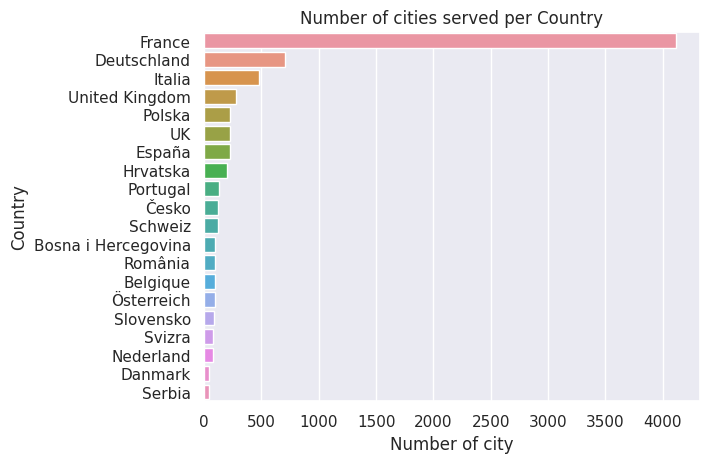

In [6]:
# Extract country, to see the reparttition of countries served by Tictactrip
city_df['Country'] = city_df['local_name'].str.strip().str.split(',').str[-1].str.strip()


# Number of country served
print(f"Number of country served is: {len(city_df['Country'].unique())}")

print()

# Let see the number of city in each country
top_20_countries = city_df['Country'].value_counts().head(20).reset_index(name='count')
ax = sns.barplot(
    y = top_20_countries['index'],
    x = top_20_countries['count']
)
ax.set(
    xlabel = 'Number of city',
    ylabel = 'Country',
    title = 'Number of cities served per Country'
)
plt.show()

# print(city_df['Country'].value_counts().head(20))



*   IL semblerait que 84 pays soient derservis par Tictactrip. Cependant, en regardant la resultat en dessous, qui presente le top 10 des pays deservis, nous constatons qu'il y'a des ``` United Kingdom ``` et ``` UK ``` qui represente le meme pays mais sont comptes comme 2 elements differents. Nous pouvons penser qu'il s'agit pas du seul cas de genre. Cela signifie donc que 84, ne represente pas le veritable de nombre pays desrvis.
*   Nous remarquons egalement que les pays sont pas tous dans la meme langue comme ``` Polska ``` pour la Pologone ou encore ``` España   ``` pour l'Espagne, etc... Nous pensons qu'il serait interessant d'uniformer la langue pour ces differents pays.

Ceci peut etre resolu en utilisant le package ``` geopy ``` puisque nous avons avec precision la latitude et longitude des lieux deservis.



In [7]:
# Here is an example

# Initialize Nominatim API
geolocator = Nominatim(user_agent="Tech_test")

first_row = city_df.iloc[0].loc[['latitude', 'longitude']]
location = geolocator.reverse(f"{first_row['latitude']},{first_row['longitude']}", language='en')
location.raw['address']

{'amenity': 'Università degli Studi di Padova',
 'road': 'Via otto Febbraio',
 'suburb': 'San Giuseppe',
 'city': 'Padua',
 'county': 'Padova',
 'ISO3166-2-lvl6': 'IT-PD',
 'state': 'Veneto',
 'ISO3166-2-lvl4': 'IT-34',
 'postcode': '35149',
 'country': 'Italy',
 'country_code': 'it'}

## Stations

In [8]:
# Load the stations csv file
station_df = pd.read_csv(stations_path)

station_df

,id,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737
...,...,...,...,...
11030,11032,Porto Avda De Los Aliados,41.146922,-8.611122
11031,11033,Rom Ciampino Flughafen Piazzale Leonardo da Vinci,41.804102,12.597110
11032,11034,Sants,41.379892,2.139462
11033,11035,Vozilici D66,45.157136,14.164140


In [9]:
# Show informations about columns types
station_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11035 entries, 0 to 11034
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11035 non-null  int64  
 1   unique_name  11035 non-null  object 
 2   latitude     11035 non-null  float64
 3   longitude    11035 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 345.0+ KB




*   Comme precedemment, il semble que Pandas a importer les differents attributs avec le bon format.  Donc nous n'aurons pas besoin de faire de convertion supplementaire.
*   Au niveau des valeurs nulles, nous pouvons constater qu'il n'y a aucun elements manquants



* Toujours avec ce resultat, nous retenons donc que Tictactrip desert aujourd'hui ``` 11 035 ``` stations.







## Providers

In [10]:
# Load the providers csv file
provider_df = pd.read_csv(providers_path)

provider_df

,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus
...,...,...,...,...,...,...,...,...,...,...
222,8384,10,16,thalys,Thalys,True,True,False,True,train
223,8385,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
224,8387,30,NaN,vatry,Vatry,NaN,NaN,NaN,NaN,bus
225,8388,40,NaN,beauval,Beauval,NaN,NaN,NaN,NaN,bus


In [97]:
# Show informations about columns types
print(provider_df.info())

print()

# Check uniqueness of id
print(f"------- Number of unique id: {len(provider_df['id'].unique())}")

print()

# Let's also check uniqueness of name
nb_unique_names = len(
    provider_df['name'].str.strip().str.lower().unique() # we remove at the begining and at the end and then lower all names
)
print(f"------- Number of unique provider's name: {nb_unique_names}")

print(provider_df['provider_id'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    227 non-null    int64 
 1   company_id            227 non-null    int64 
 2   provider_id           227 non-null    object
 3   name                  227 non-null    object
 4   fullname              227 non-null    object
 5   has_wifi              224 non-null    object
 6   has_plug              224 non-null    object
 7   has_adjustable_seats  224 non-null    object
 8   has_bicycle           224 non-null    object
 9   transport_type        227 non-null    object
dtypes: int64(2), object(8)
memory usage: 17.9+ KB
None

------- Number of unique id: 227

------- Number of unique provider's name: 227
[-1 '31' '33' '37' '41' '45' '47' '49' '57' '65' '77' '81' '83' '85' '111'
 '115' '129' '141' '149' '151' '159' '161' '163' '165' '167' '169' '171'
 '173' '17


*   Pour ce qui est des types de donnees:
  *  ```provider_id``` a premiere vu on pourrait croire que cette colonne n'a pas le bon type mais en y regardant de plus pret on se rend compte qu'il y'a des caracteres, Il pourrait s'agir d'une erreur donc il serait judicieux de les retirer. puisqu'il y'a en a que 3.
  *  ```has_wifi```, ```has_plug```, ```has_adjustable_seats```, ```has_bicycle``` doivent etre des booleens
  * Le reste des colonnes sont a priori sous le bon format

*   Concernat les valeurs nulles, nous avons 5/10 colonnes ont des valeurs nulles:
    * ```provider_id``` = 6,2%
    * ```has_wifi```, ```has_plug```, ```has_adjustable_seats```, ```has_bicycle``` = 1,3%

*  Avec les differents check que nous fait ci-dessous mais avec le nombre de valeurs non-nulles, nous pouvons conclure que Tictactrip a 227 providers.



In [81]:
# Here we construct function to get label since we'll use it many (DRY convention)
def construct_labels(df, column):
  """
      Build label for bar plot like count(percentation %)

      Args:
        df(Dataframe): Dataframe to consider
        column(str): Column to construct label

      Return:
        list
  """
  abs_values = df[column].value_counts() # here we count the number of provider for each transport type
  rel_values = df[column].value_counts(normalize=True).values * 100 # here is the percentage
  lbls = [f'{p[0]} ({p[1]:.1f}%)' for p in zip(abs_values, rel_values)] # Here we build a labels to show in the bar chart

  return lbls

# Construct function to construct bar plot
def bar_plot(df, column, xlabel, ylabel, title, ax=None):
  """
      Build a bar plot

      Args:
        df(Dataframe): dataframe to be consider
        column(str): column to show bar
        xlabel(str): name of the x axis
        ylabel(str): name of the y axis
        title(str): title of the figure
        labels(list): list of label to show on top of all the bars
        ax(Axis): axis to plot the chart
      Return :
        matplotlib.axes._axes.Axes
  """
  # We define bar chart
  chart = None
  if ax is not None:
    print('ici')
    chart = sns.countplot(
      x = df[column],
      order = df[column].value_counts().index,
      ax=ax
    )
  else:
    chart = sns.countplot(
      x = df[column],
      order = df[column].value_counts().index,
    )

  # We rename xlabel and ylabel and set title
  chart.set(
      xlabel=xlabel,
      ylabel=ylabel,
      title=title
  )

  return chart

### Distribution of provider base on transport type

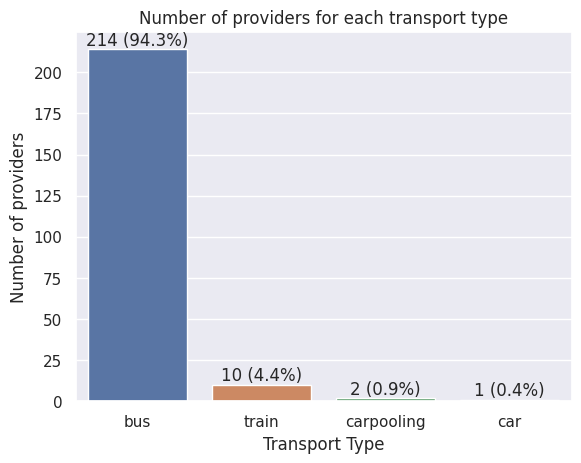

In [82]:
# Get label
lbls = construct_labels(provider_df, 'transport_type')

# Get the chart
transport_type_chart = bar_plot(
    provider_df,
    column='transport_type',
    xlabel='Transport Type',
    ylabel='Number of providers',
    title='Number of providers for each transport type',
  )

# We set labels
transport_type_chart.bar_label(container=transport_type_chart.containers[0], labels=lbls)
plt.show()

Avec le graphe ci-dessous:
  - On peut tres clairement constater que la grande majorite des providers de Tictactrip propose comme type de transport le ```bus``` (94%)
  -  Ensuite nous avons```train```(4%), puis le ```carpooling```(1%) et enfin juste 1 provider propose le ```car``` comme type de transport

### Explore ```has_wifi```, ```has_plug```, ```has_adjustable_seats```, ```has_bicycle```

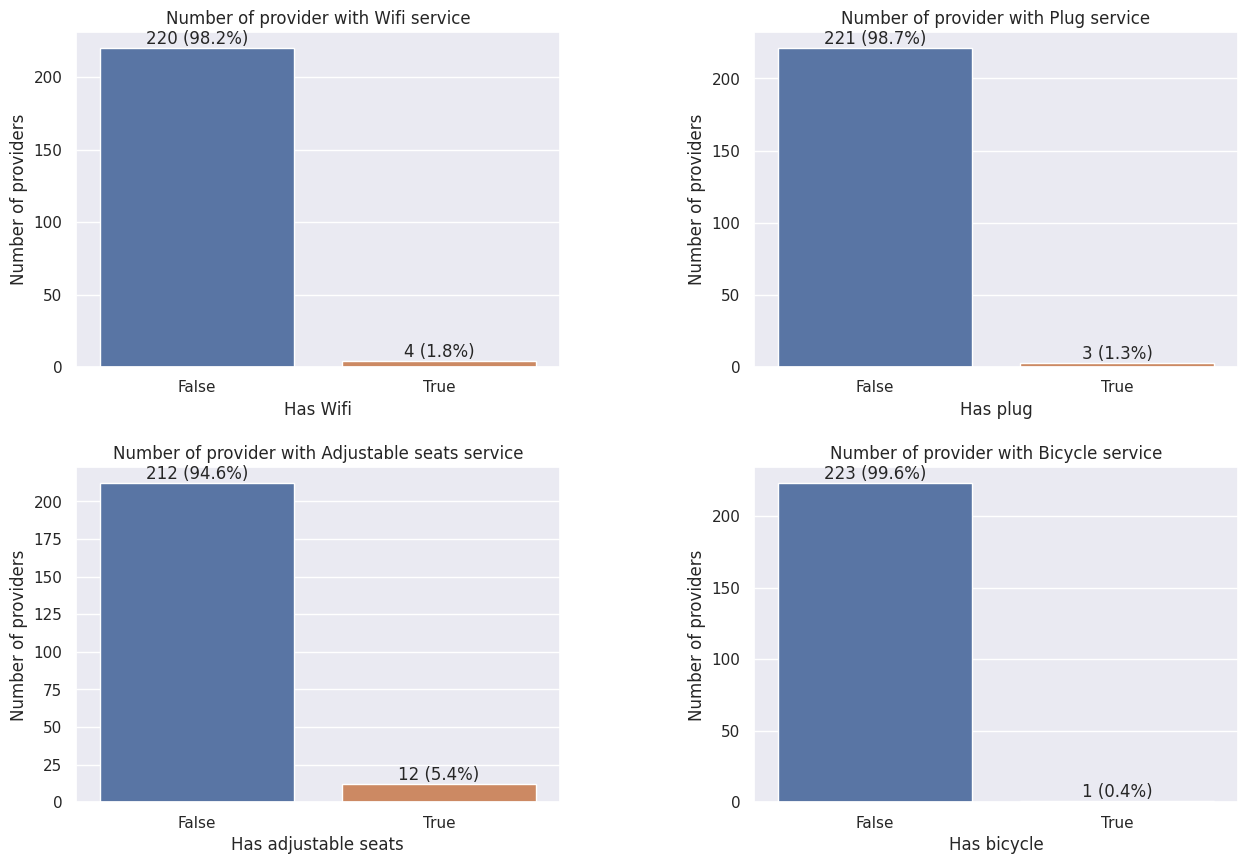

In [84]:
plt.figure(figsize=(15, 10))

pairs = [(i, j) for i in range(2) for j in range(2)]

cols_to_explore = [
    'has_wifi', 'has_plug', 'has_adjustable_seats', 'has_bicycle'
]
xlabels = [
    'Has Wifi', 'Has plug', 'Has adjustable seats', 'Has bicycle'
]

title_base = 'Number of provider with :service service'

services = [
    'Wifi', 'Plug', 'Adjustable seats', 'Bicycle'
]

for ax_num, col, xlbl, service, ax in zip(range(1, 5), cols_to_explore, xlabels, services, pairs):
  # Plot has_wifi chart
  lbls = construct_labels(provider_df, col)

  plt.subplot(2, 2, ax_num)

  # Get the chart
  chart = bar_plot(
      provider_df,
      column=col,
      xlabel=xlbl,
      ylabel='Number of providers',
      title=title_base.replace(':service', service),
  )
  chart.bar_label(container=chart.containers[0], labels=lbls)

plt.subplots_adjust(wspace=0.4, hspace=0.3)
plt.show()

Avec le schema ci-dessus, nous pouvons voir que la majorite des providers n'offre pas(ou tres peu) de serve de wifi, de prise de charge, de place ajustables ou encore des velos.

## Tickets

In [15]:
# Load the ticket_data csv file
ticket_data_df = pd.read_csv(
    ticket_data_path, parse_dates = ['departure_ts', 'arrival_ts', 'search_ts']
)

ticket_data_df

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327000+00:00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212000+00:00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213000+00:00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213000+00:00,"{5983,5983}",{8380},611,542
...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279.0,10729.0,2017-10-27 02:30:00+00:00,2017-10-27 16:00:00+00:00,2590,2017-10-19 10:35:42.943000+00:00,"{408,408}",{8371},628,562
74164,6869185,9,279.0,304.0,2017-10-27 07:00:00+00:00,2017-10-27 13:30:00+00:00,2700,2017-10-19 10:35:42.943000+00:00,"{1105,1105}",{9},628,562
74165,6869187,8371,10642.0,304.0,2017-10-27 08:30:00+00:00,2017-10-27 15:15:00+00:00,3000,2017-10-19 10:35:42.943000+00:00,"{1105,1105}",{9},628,562
74166,6869189,13,279.0,304.0,2017-10-27 13:25:00+00:00,2017-10-27 21:10:00+00:00,2880,2017-10-19 10:35:42.943000+00:00,"{863,863}",{13},628,562


In [17]:
# Get column data type informations
ticket_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74168 entries, 0 to 74167
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id               74168 non-null  int64              
 1   company          74168 non-null  int64              
 2   o_station        32727 non-null  float64            
 3   d_station        32727 non-null  float64            
 4   departure_ts     74168 non-null  datetime64[ns, UTC]
 5   arrival_ts       74168 non-null  datetime64[ns, UTC]
 6   price_in_cents   74168 non-null  int64              
 7   search_ts        74168 non-null  datetime64[ns, UTC]
 8   middle_stations  32727 non-null  object             
 9   other_companies  32727 non-null  object             
 10  o_city           74168 non-null  int64              
 11  d_city           74168 non-null  int64              
dtypes: datetime64[ns, UTC](3), float64(2), int64(5), object(2)
memory usage: 6

* A propos du data type :
  *   ```o_station``` et ```d_station``` dovient etre convetis en int
  * Pour avoir un match entre la colonne ```company``` de ticket_date et ```provider_id``` de provider_df nous allons convertir cette colonne en string
  * Le restes de colonnes sont du bon type.

*   Concernant les valeurs nulles
  *   ```o_station```, ```d_station```, ```middle_stations```, ```other_companies``` ont environ 55,6% de valeurs nulles
  * Il serait interessant de comprendre pourquoi ces elements sont nulles puisque nous avons les informations sur la ville de depart et de destination




### Breve description sur la duree des trajets

In [18]:
# Get the max and min date
all_dates = list(ticket_data_df['arrival_ts'].unique()) + list(ticket_data_df['departure_ts'].unique())
min_date = min(all_dates)
max_date = max(all_dates)

# The period range of our data
print(f"------- The data goes from : {min_date} to {max_date}")


# Compute de arrival and departure difference and the result is a time delta
ticket_data_df['timedelta_duration'] = ticket_data_df['arrival_ts'] - ticket_data_df['departure_ts']

# We get the time in second for the time delta
ticket_data_df['duration_second'] = ticket_data_df['timedelta_duration'].dt.total_seconds()

------- The data goes from : 2017-09-08 06:00:00+00:00 to 2018-03-30 05:45:00+00:00


#### Quelques statistiques sur la duree des trajets

In [19]:
# Some statistic about
ticket_data_df['timedelta_duration'].describe()

count                        74168
mean     0 days 07:04:37.247600043
std      0 days 09:54:58.881351022
min                0 days 00:20:00
25%                0 days 03:00:00
50%                0 days 04:50:00
75%                0 days 08:00:00
max               20 days 12:51:00
Name: timedelta_duration, dtype: object

*   Nous avons un total de ```74 168``` tickets
*   Comme petit resume concernant les durees :
  * En ```moyenne``` un trajet dure environ ```07h```
  * La duree ```maximale``` d'un trajet est d'environ ```20j 13h```. Cela me parrait plutot eleve et il peut s'agir d'un outlier. Nous pourrons approfondir ce point.
  * La duree ```minimale``` quant a elle est de ```20 min```
  * ```25%``` des trajets on une duree de ```03h```, ```50%``` une duree de ```4h50min``` et ```75%``` une duree de ```08h```

### Le mois avec le plus grand nombre de tickets

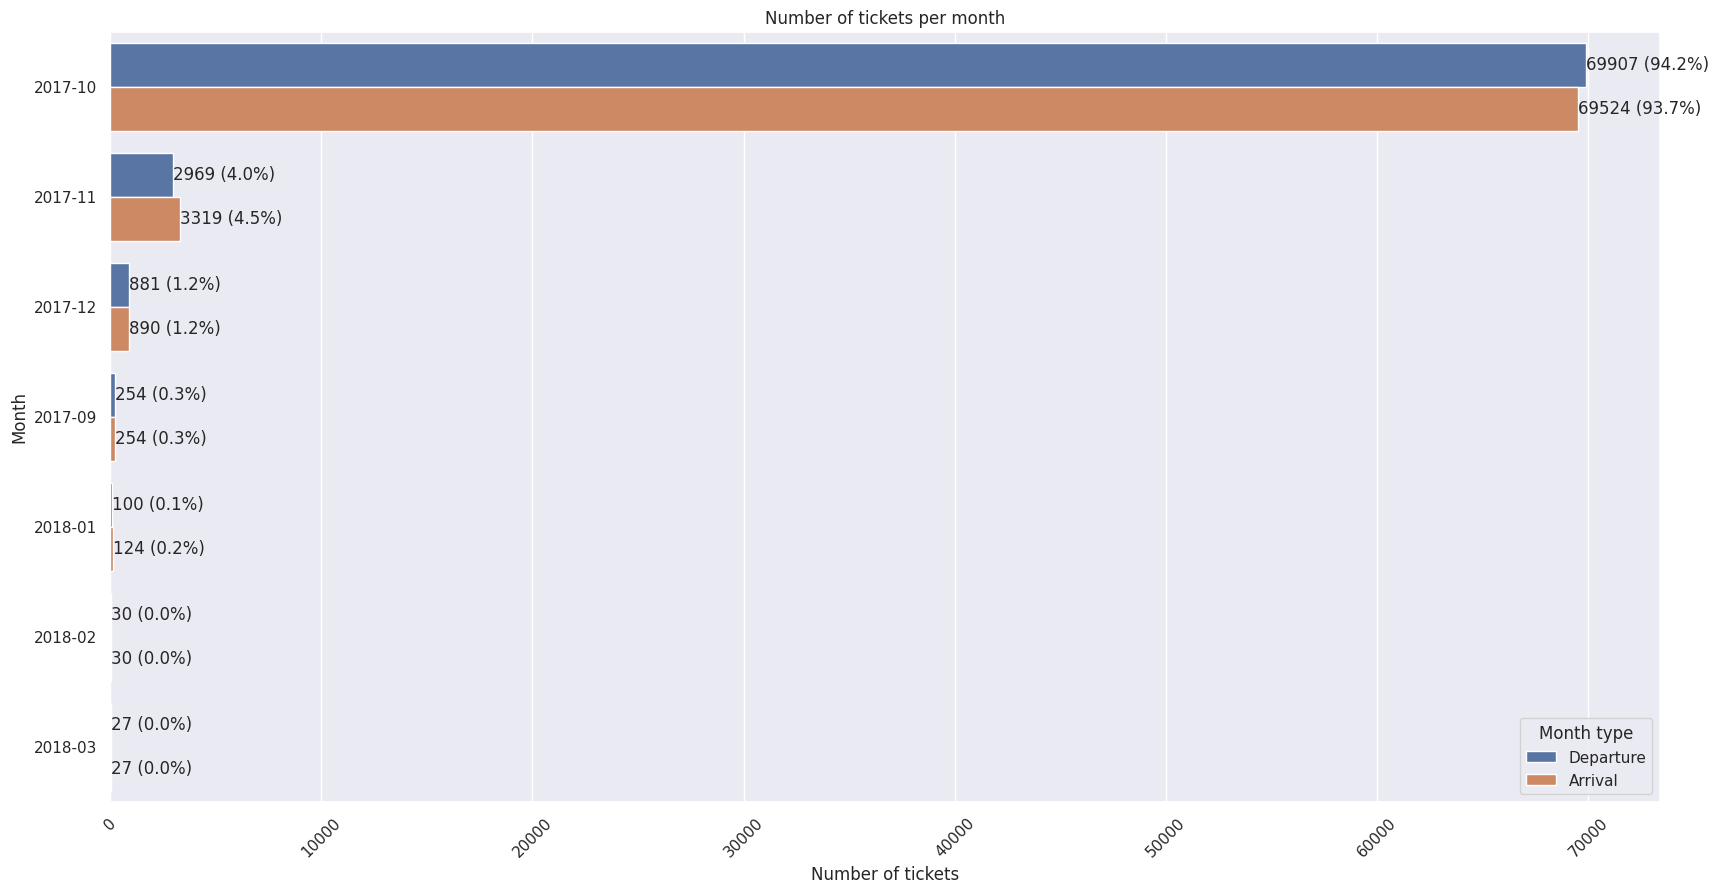

In [93]:
# Count number of ticket for each month
dep_ticket_per_month = ticket_data_df.resample('M', on='departure_ts').size().sort_values(ascending=False).reset_index(name='nb_ticket')
dep_ticket_per_month.rename(columns={'departure_ts': 'date'}, inplace=True) # Rename the column
dep_ticket_per_month['month'] = dep_ticket_per_month['date'].dt.strftime('%Y-%m') # Get the month
dep_ticket_per_month['type']  = 'Departure'

abs_values = dep_ticket_per_month['nb_ticket'].values
rel_values = np.round((abs_values /  len(ticket_data_df)) * 100, 2)
dep_lbls = [f'{p[0]} ({p[1]:.1f}%)' for p in zip(abs_values, rel_values)] # Here we build a labels to show in the bar chart


arr_ticket_per_month = ticket_data_df.resample('M', on='arrival_ts').size().sort_values(ascending=False).reset_index(name='nb_ticket')
arr_ticket_per_month.rename(columns={'arrival_ts': 'date'}, inplace=True)
arr_ticket_per_month['month'] = arr_ticket_per_month['date'].dt.strftime('%Y-%m')
arr_ticket_per_month['type']  = 'Arrival'

abs_values = arr_ticket_per_month['nb_ticket'].values
rel_values = np.round((abs_values /  len(ticket_data_df)) * 100, 2)
arr_lbls = [f'{p[0]} ({p[1]:.1f}%)' for p in zip(abs_values, rel_values)] # Here we build a labels to show in the bar chart

merged_ticket_per_month = pd.concat([dep_ticket_per_month, arr_ticket_per_month])

plt.figure(figsize=(20, 10))

ax = sns.barplot(
    data = merged_ticket_per_month,
    y = 'month',
    x = 'nb_ticket',
    hue='type'

    # order = ticket_data_df.resample('M', on='departure_ts').size(as)
)
ax.tick_params(axis='x', rotation=45)
ax.set(
    ylabel = 'Month',
    xlabel = 'Number of tickets',
    title = 'Number of tickets per month',
)

# Rename the legend title and also location
plt.legend(title='Month type', loc="lower right")

ax.bar_label(container = ax.containers[0], labels=dep_lbls) # departure month labels
ax.bar_label(container = ax.containers[1], labels=arr_lbls) # arrival month labels

plt.show()

*   Avec une extraction du nombre de ticket a la fois sur la colonne ````departure_ts```` and ````arrival_ts```` nous pouvons confirmer que c'est le mois d'````Octobre 2017```` qui possede le plus grand nombre de tickets avec un ecart assez ecrasant sur les autres mois.

### Le mois qui a genere le plus de cash

,departure_ts,total_amount
0,2017-10-31 00:00:00+00:00,308781107
1,2017-11-30 00:00:00+00:00,10610095
2,2017-12-31 00:00:00+00:00,4418356
3,2017-09-30 00:00:00+00:00,649800
4,2018-01-31 00:00:00+00:00,388316
5,2018-02-28 00:00:00+00:00,122650
6,2018-03-31 00:00:00+00:00,86590


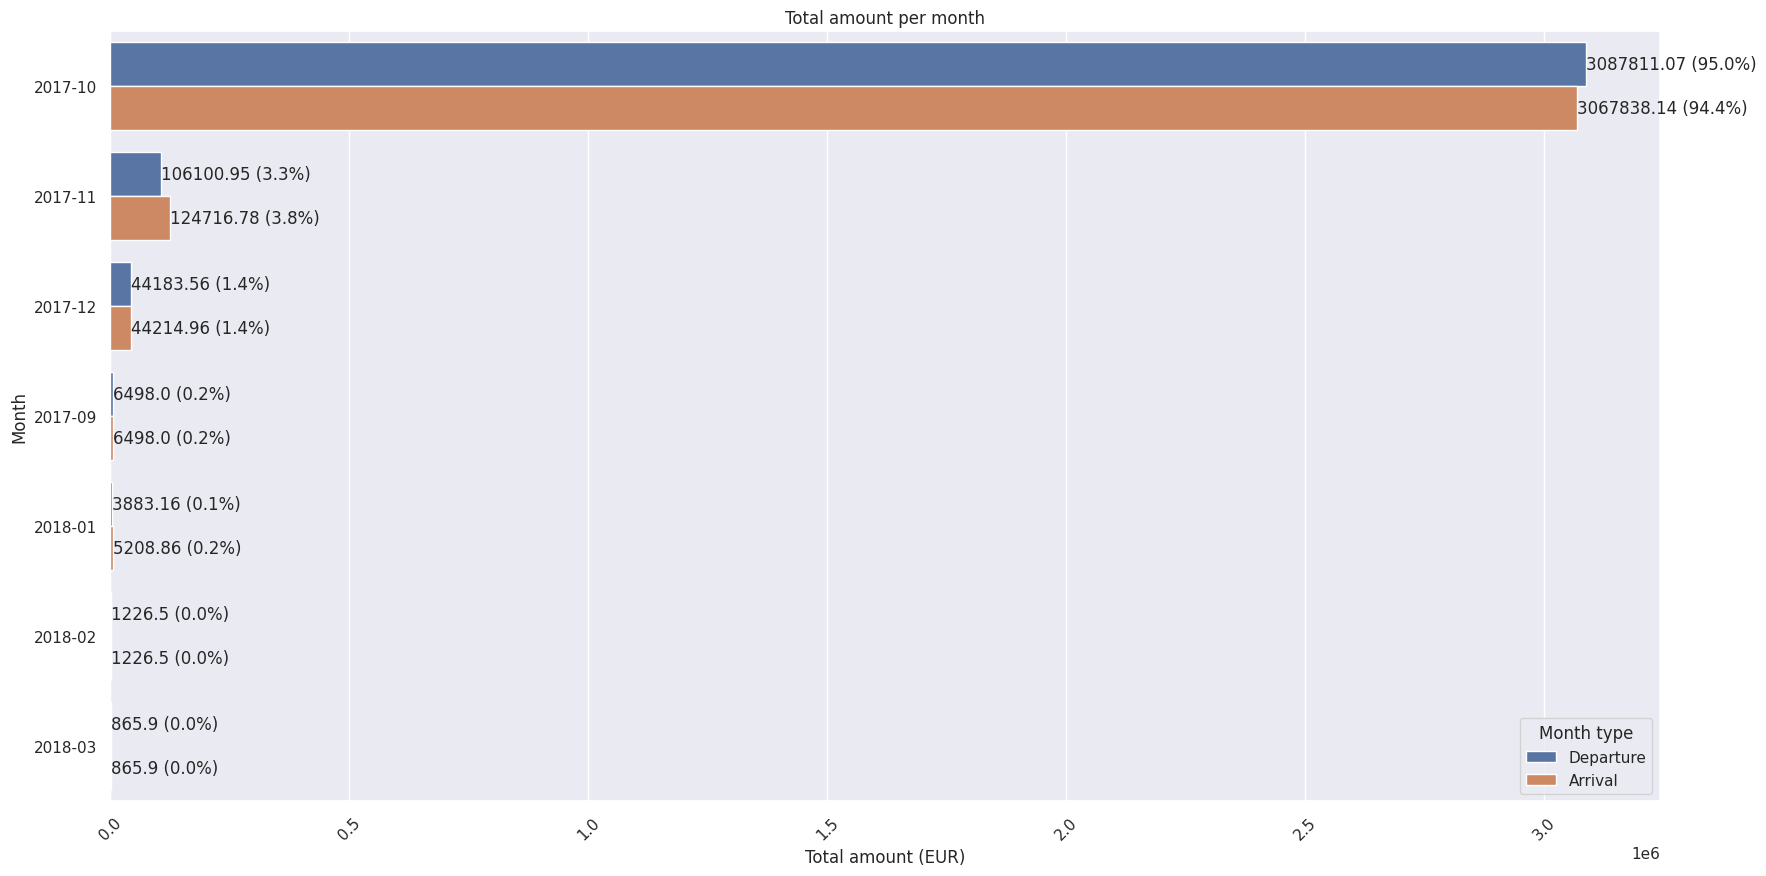

In [107]:
# Total amount for each month
dep_amount_per_month = ticket_data_df.resample('M', on='departure_ts')['price_in_cents'].sum().sort_values(ascending=False).reset_index(name='total_amount')
dep_amount_per_month['total_amount'] = dep_amount_per_month['total_amount']  / 100 # convert to euro
dep_amount_per_month.rename(columns={'departure_ts': 'date'}, inplace=True) # Rename the column
dep_amount_per_month['month'] = dep_amount_per_month['date'].dt.strftime('%Y-%m') # Get the month
dep_amount_per_month['type']  = 'Departure'

abs_values = dep_amount_per_month['total_amount'].values
rel_values = np.round((abs_values /  (np.sum(ticket_data_df['price_in_cents']/100))) * 100, 2)
dep_lbls = [f'{p[0]} ({p[1]:.1f}%)' for p in zip(abs_values, rel_values)] # Here we build a labels to show in the bar chart


arr_amount_per_month = ticket_data_df.resample('M', on='arrival_ts')['price_in_cents'].sum().sort_values(ascending=False).reset_index(name='total_amount')
arr_amount_per_month['total_amount'] = arr_amount_per_month['total_amount']  / 100 # convert to euro
arr_amount_per_month.rename(columns={'arrival_ts': 'date'}, inplace=True)
arr_amount_per_month['month'] = arr_amount_per_month['date'].dt.strftime('%Y-%m')
arr_amount_per_month['type']  = 'Arrival'

abs_values = arr_amount_per_month['total_amount'].values
rel_values = np.round((abs_values /  (np.sum(ticket_data_df['price_in_cents']/100))) * 100, 2)
arr_lbls = [f'{p[0]} ({p[1]:.1f}%)' for p in zip(abs_values, rel_values)] # Here we build a labels to show in the bar chart

merged_amount_per_month = pd.concat([dep_amount_per_month, arr_amount_per_month])

plt.figure(figsize=(20, 10))

ax = sns.barplot(
    data = merged_amount_per_month,
    y = 'month',
    x = 'total_amount',
    hue='type'

    # order = ticket_data_df.resample('M', on='departure_ts').size(as)
)
ax.tick_params(axis='x', rotation=45)
ax.set(
    ylabel = 'Month',
    xlabel = 'Total amount (EUR)',
    title = 'Total amount per month',
)

# Rename the legend title and also location
plt.legend(title='Month type', loc="lower right")

ax.bar_label(container = ax.containers[0], labels=dep_lbls) # departure month labels
ax.bar_label(container = ax.containers[1], labels=arr_lbls) # arrival month labels

plt.show()



*   Comme on pouvait s'y attendre c'est le mois d'Octobre 2017 qui a genere le plus de cash vu que c'etait egalement lui qui avait le plus de ticket vendu



### Les jours de la semaine avec le plus depart

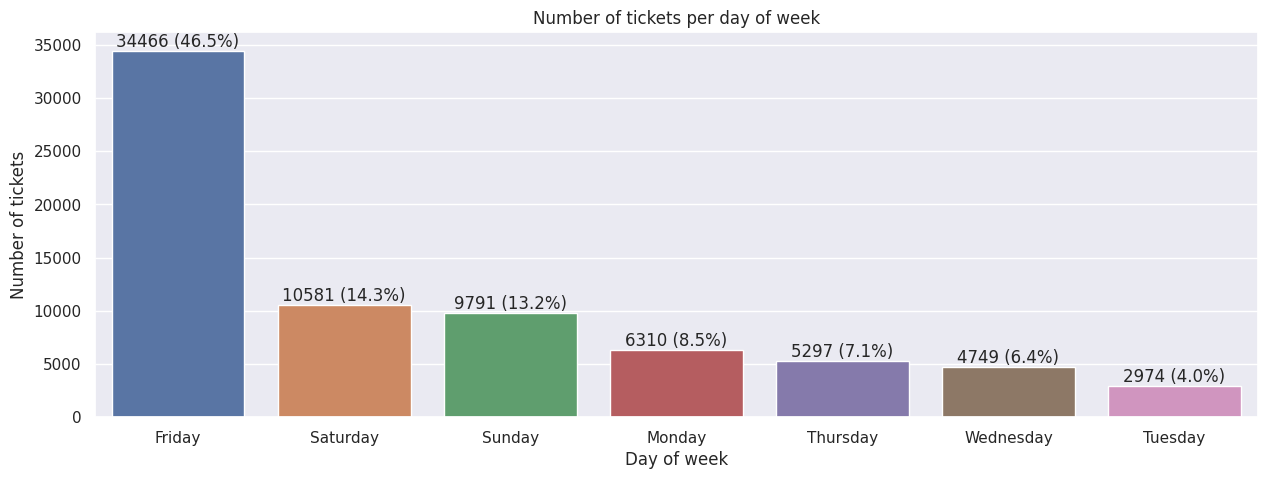

In [154]:
plt.figure(figsize=(15, 5))

ticket_data_df['dep_dow_name'] = ticket_data_df['departure_ts'].dt.strftime('%A')

# Get label
lbls = construct_labels(ticket_data_df, 'dep_dow_name')

# Get the chart
dow_chart = bar_plot(
    ticket_data_df,
    column='dep_dow_name',
    xlabel='Day of week',
    ylabel='Number of tickets',
    title='Number of tickets per day of week',
  )

# We set labels
dow_chart.bar_label(container=dow_chart.containers[0], labels=lbls)
plt.show()

### Breve description sur les prix

In [21]:
# Description of price
ticket_data_df['price_in_cents'].describe()

count    74168.000000
mean      4382.711061
std       3739.325367
min        300.000000
25%       1900.000000
50%       3350.000000
75%       5250.000000
max      38550.000000
Name: price_in_cents, dtype: float64

*   En moyenne, un trajet coute ``` 4 383 cents``` ce qui est qui correspond a environ ```44 euros```.
*  Le prix ```max``` est de ```385.5 euros```. Le prix ```min``` est de ```3 euros```.
*   ```25%``` des trajets coutent ```19 euros```, ```50%``` coutent ```33.5 euros``` et ```75%``` des trajets coutent ```52.5 euros```.

### Merge de tous les datasets

* De prime a bord, nous aurions pu faire un merge de ticket_data sur les colonnes o_station and d_station. Mais ici, ce n'est pas vraiment une bonne idee parce que nous avons plus de la moitie des valeurs qui sont nulles.
* Donc, notre merge va plutot s'appuyer sur o_city and d_city puisque toutes les valeurs sont definis

In [168]:
# Convert company string for ticket data
ticket_data_df['company'] = ticket_data_df['company'].astype(int)

# Add prefix for origin city data
o_city_df = city_df.add_prefix('o_')

# Add prefix for destination city data
d_city_df = city_df.add_prefix('d_')

# Merge of ticket_data with the other dataset
ticket_merged_df = ticket_data_df.merge(o_city_df, how='left', left_on='o_city', right_on='o_id') \
  .merge(d_city_df, how='left', left_on='d_city', right_on='d_id').drop(columns=['o_id', 'd_id']) \
  .merge(provider_df[['id', 'name', 'transport_type']], how='left', left_on='company', right_on='id').drop(columns='id_y').rename(columns={'id_x': 'id'})

In [170]:
def calculate_distance(row):
  """
      Calculate distance (km) between two points based on latitude and longitude

      Args:
        row(Pandas.Series): Dataframe row that contains latitude and longitude of both origin and destination points

      Return
        float
  """
  origin = (row['o_latitude'], row['o_longitude'])
  destination = (row['d_latitude'], row['d_longitude'])

  dist = round(distance.geodesic(origin, destination).km, 2)
  return dist



# Let add distance between origin and destination
ticket_merged_df['distance'] = ticket_merged_df.apply(calculate_distance, axis=1)

### Breve description du temps de trajet

In [171]:
ticket_merged_df['distance'].describe()

count    74168.000000
mean       363.360857
std        195.011264
min         18.960000
25%        205.930000
50%        339.050000
75%        480.740000
max       1875.170000
Name: distance, dtype: float64

* En moyenne un trajet dure ```363 km```
* Le plus long trajet dure ```1875 km``` et le plus court est de ```19 km```
* ```25%``` des trajets ont une longueur de ```206 km```, ```50%``` une longueur de ```339 km``` et ```75%``` une longueur de ```481 km```

### Les providers qui ont le plus de tickets

In [183]:
# Number of provider present in the ticket data
nb_prov = len(ticket_merged_df['name'].unique())

print(f"---- We have {nb_prov} out of {len(provider_df)} present in ticket data")

---- We have 20 out of 227 present in ticket data




*   Seulement ```20``` providers sur les ```227``` ont ete actifs durant cette periode



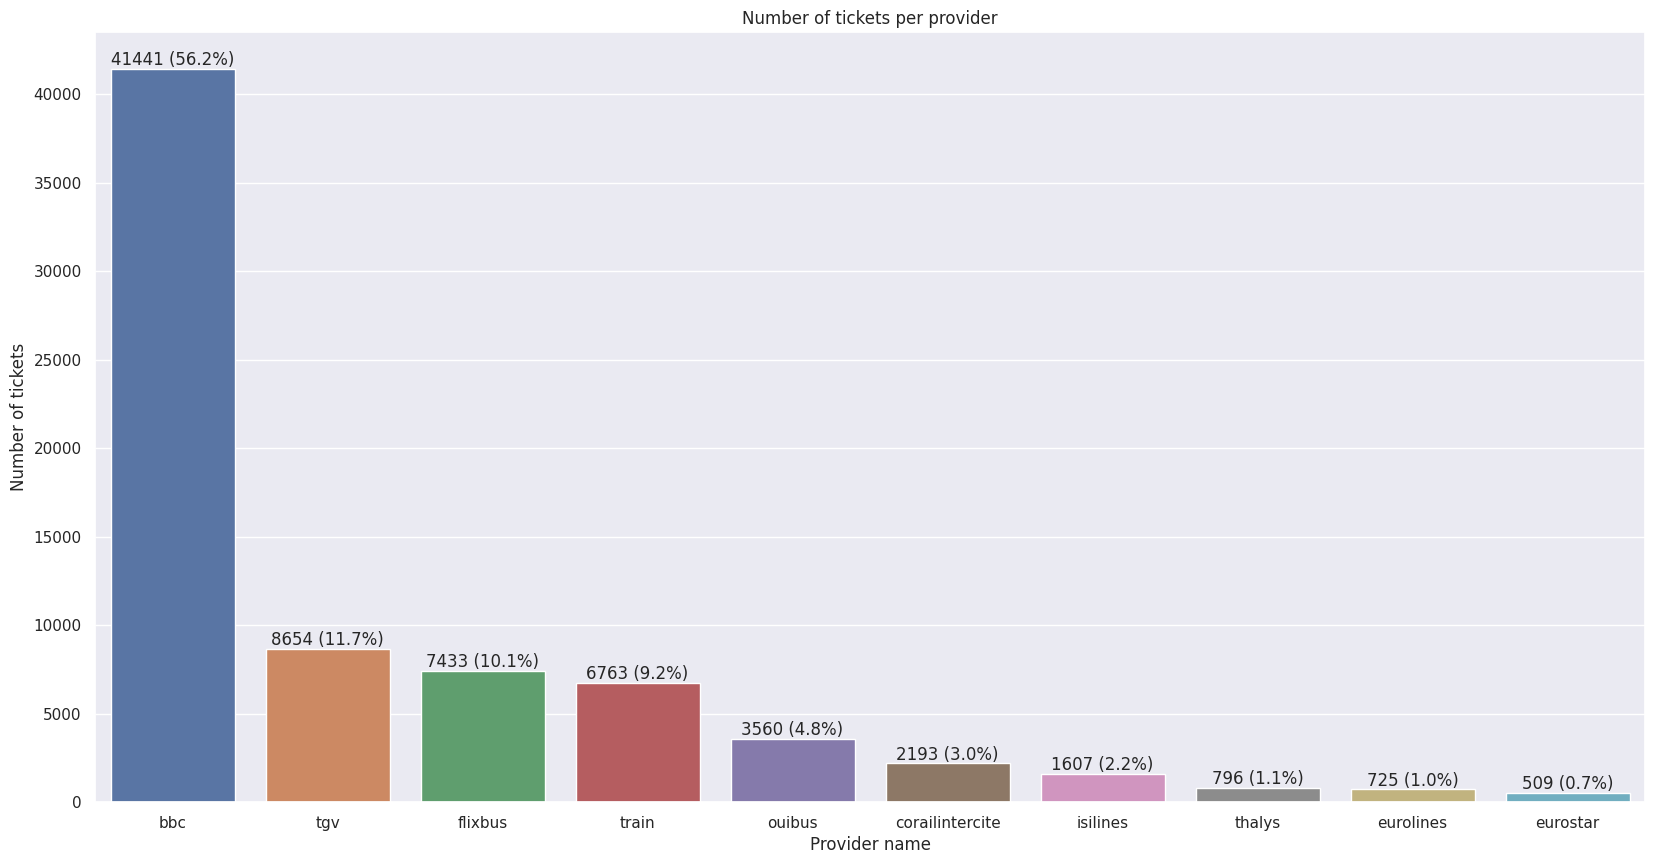

In [181]:
# Top 10 providers
providers = ticket_merged_df['name'].value_counts().index[:10]
top_prov = ticket_merged_df[ticket_merged_df['name'].isin(providers)]

plt.figure(figsize=(20, 10))

# Get label
lbls = construct_labels(top_prov, 'name')

# Get the chart
provider_chart = bar_plot(
    top_prov,
    column='name',
    xlabel='Provider name',
    ylabel='Number of tickets',
    title='Number of tickets per provider',
  )

# We set labels
provider_chart.bar_label(container=provider_chart.containers[0], labels=lbls)
plt.show()

* Le provider qui se distingue le plus pendant cette periode est dont ``` bbc ``` avec ```56.2%``` de l'ensemble des tickets.

### Les moyens de tranpsort les plus utilises

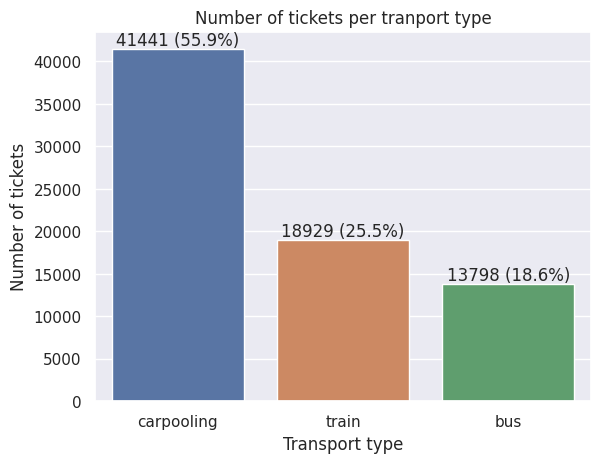

In [184]:
# Get label
lbls = construct_labels(ticket_merged_df, 'transport_type')

# Get the chart
transport_type_chart = bar_plot(
    ticket_merged_df,
    column='transport_type',
    xlabel='Transport type',
    ylabel='Number of tickets',
    title='Number of tickets per tranport type',
  )

# We set labels
transport_type_chart.bar_label(container=transport_type_chart.containers[0], labels=lbls)
plt.show()

* ```99.9%``` des trajets se font en ```train```

### Comparaison prix et distance en fonction des type de moyens de transport utilise.

In [185]:
ticket_merged_df.groupby('transport_type')['price_in_cents', 'distance'].agg(['min', 'max', 'mean', 'median'])

<ipython-input-185-9592b992ea11>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ticket_merged_df.groupby('transport_type')['price_in_cents', 'distance'].agg(['min', 'max', 'mean', 'median'])


price_in_cents                             distance           \
                          min    max         mean  median      min      max   
transport_type                                                                
bus                       850  22900  3652.448036  3300.0    27.40  1875.17   
carpooling                300  16150  2742.171907  2500.0    18.96  1755.79   
train                     490  38550  8506.634793  7540.0    19.28  1037.26   

                                    
                      mean  median  
transport_type                      
bus             474.857843  466.35  
carpooling      306.949662  287.79  
train           405.587118  390.84



*   Nous constatons que prime a bord que le prix moyen d'un transport en bus est plus eleve que celui en train. Ceci peut aussi etre explique par le fait que les distances parcourues sont en moyenne aussi plus importante en bus qu'en train.



### Faisons une petite segmentation des distances et regardons ce qu'il en ait

In [186]:
# Let's do the segementation propose in the description
ticket_merged_df['distance_seg'] = np.where(
    ticket_merged_df['distance'] < 200,
    '0 - 200km',
    np.where(
        ticket_merged_df['distance'] < 800,
        '201 - 800km',
        np.where(
            ticket_merged_df['distance'] < 2000,
            '801 - 2000km',
            '2000km +'
        )
    )
)

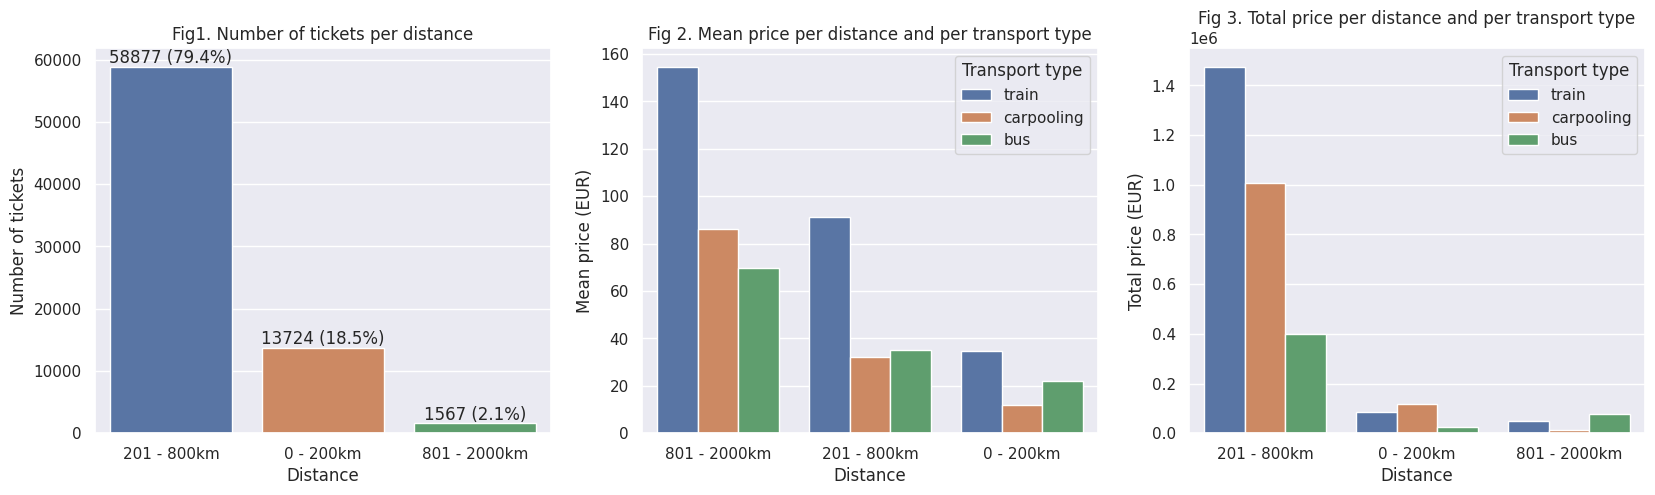

In [187]:
# Let's see the repartition
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)

# Get label
lbls = construct_labels(ticket_merged_df, 'distance_seg')

# Get the chart
distance_seg_chart = bar_plot(
    ticket_merged_df,
    column='distance_seg',
    xlabel='Distance',
    ylabel='Number of tickets',
    title='Fig1. Number of tickets per distance',
  )

# We set labels
distance_seg_chart.bar_label(container=distance_seg_chart.containers[0], labels=lbls)


result = ticket_merged_df.groupby(['transport_type', 'distance_seg'])['price_in_cents'] \
  .agg(['mean', 'sum']).reset_index() \
  .rename(columns = {'mean': 'mean_price', 'sum': 'total_price'}) \
  .sort_values(by='mean_price', ascending=False)

result['mean_price'] = result['mean_price'] / 100 # convert from cent to euro
result['total_price'] = result['total_price'] / 100 # convert from cent to euro

# Fig 2. Mean price per distance per transprt type
plt.subplot(1, 3, 2)
price_chart = sns.barplot(
    data = result,
    x = 'distance_seg',
    y = 'mean_price',
    hue = 'transport_type'
)
price_chart.set(
    xlabel = 'Distance',
    ylabel = 'Mean price (EUR)',
    title = 'Fig 2. Mean price per distance and per transport type'
)
plt.legend(title="Transport type")


plt.subplot(1, 3, 3)
result = result.sort_values(by='total_price', ascending=False)
price_chart = sns.barplot(
    data = result,
    x = 'distance_seg',
    y = 'total_price',
    hue = 'transport_type'
)
price_chart.set(
    xlabel = 'Distance',
    ylabel = 'Total price (EUR)',
    title = 'Fig 3. Total price per distance and per transport type'
)
plt.legend(title="Transport type")
# plt.subplots_adjust(wspace=0.4, hspace=0.3)
plt.show()





*   Avec la Fig 1, nous pouvons voir que la plupart des trajets ont donc entre ```201 - 800km```(79,4%)
* La Fig 2, nous permet quant elle de remarquer que en moyenne, les trajets entre ```801 - 2000km``` rapportent plus malgre qu'ils sont moins souvent utilises et egalement que ce type de transport se font le plus souvent en train.



# Forecasting des prix

In [234]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

## Selection des colonnes

In [209]:
# Let define columns that we'll remove from start before doing some
cols_to_remove = [
    'id',
    'o_station', 'd_station', # Because of many missing values
    'search_ts', # I'm not shure it'll really usefull
    'middle_stations', 'other_companies', # Because of many missing values,
    'timedelta_duration', # We'll use insted duration in secnods
    'o_local_name', 'o_unique_name', # we'll use unique_name
    'o_latitude', 'o_longitude', # we'll use distance
    'o_population', # Many missing values
    'd_local_name', 'd_unique_name',
    'd_latitude', 'd_longitude',
    'd_population',
    'distance_seg',
    'dep_dow_name',
    'name'
]

modeling_df = ticket_merged_df.drop(columns = cols_to_remove)

## Feature engineering

In [ ]:
# We'll some feature about the date to then remove
modeling_df['d_year'] = modeling_df['departure_ts'].dt.year
modeling_df['d_month'] = modeling_df['departure_ts'].dt.month
modeling_df['d_day'] = modeling_df['departure_ts'].dt.day
modeling_df['d_hour'] = modeling_df['departure_ts'].dt.hour
modeling_df['d_min'] = modeling_df['departure_ts'].dt.minute
modeling_df['d_min'] = modeling_df['departure_ts'].dt.second
modeling_df['d_dow'] = modeling_df['departure_ts'].dt.day_of_week
modeling_df['d_quarter'] = modeling_df['departure_ts'].dt.quarter

modeling_df['a_year'] = modeling_df['arrival_ts'].dt.year
modeling_df['a_month'] = modeling_df['arrival_ts'].dt.month
modeling_df['a_day'] = modeling_df['arrival_ts'].dt.day
modeling_df['a_hour'] = modeling_df['arrival_ts'].dt.hour
modeling_df['a_min'] = modeling_df['arrival_ts'].dt.minute
modeling_df['a_min'] = modeling_df['arrival_ts'].dt.second
modeling_df['a_dow'] = modeling_df['arrival_ts'].dt.day_of_week
modeling_df['a_quarter'] = modeling_df['arrival_ts'].dt.quarter

# Let remove departure_ts and arrival_ts
modeling_df.drop(columns = ['departure_ts', 'arrival_ts'], inplace=True)

In [213]:
"""
  We'll do one hot encoding to some columns because they are relevant to compute prediction in the price like for example o_city and d_city
  But before doing that we'll convert then to categorical
"""

cols_to_dummy = [
    'company', 'o_city', 'd_city',
    'o_Country', 'd_Country', 'transport_type'
]

# Convert to categorical var
modeling_df[cols_to_dummy] = modeling_df[cols_to_dummy].astype('category')

# Dummify categrical var
modeling_df = pd.get_dummies(modeling_df, columns = cols_to_dummy)

### Split des data

In [222]:
y =  modeling_df['price_in_cents']
X = modeling_df.drop(columns=['price_in_cents'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 20)

Nous allon utilise LightGBM qui est un algorithme de renforcement du gradient connu pour sa rapidité et son efficacité dans le traitement de grands ensembles de données. Il peut capturer des modèles non linéaires et traiter des caractéristiques complexes et hétérogènes. Dans le contexte des prévisions du prix des tickets, ```LightGBM``` peut fournir des estimations précises en tenant compte des différents facteurs qui influencent les prix.

Il est bien sur tout a fait possible d'utiliser d'autre algorithme comme Random Forest, XGboost, CatBoost, LSTM, SVR, etc..

In [ ]:
! pip install lightgbm

In [224]:
import lightgbm as lgb

In [228]:
""" We define our model

    Here we try to minimize the ```MAE (Mean Absolute Error)```: the average absolute difference between forecast and actual value

"""
lgb_model = lgb.LGBMRegressor(random_seed=20, verbose=200, objective = 'mae')


# We train the model
lgb_model.fit(X_train, y_train)

# We make the predictions
predictions = lgb_model.predict(X_test)

[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.964798
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.458704
[LightGBM] [Debug] init for col-wise cost 0.004072 seconds, init for row-wise cost 0.012407 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 1355
[LightGBM] [Info] Number of data points in the train set: 59334, number of used features: 22
[LightGBM] [Info] Start training from score 3350.000000
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Traine

In [233]:
"""
    Here we added another metrics like RMSE and MAPE wich are also good the see
    the performance of the model
"""

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mape = mean_absolute_percentage_error(y_test, predictions)

print(f" ------- MAE: {mae}\n\n")
print(f" ------- RMSE: {rmse}\n\n")
print(f" ------- MAPE: {mape}\n\n")

 ------- MAE: 624.6756871620231


 ------- RMSE: 1330.925013377301


 ------- MAPE: 0.13056994391296758






*   Un ```MAE``` of ```625 cents``` veut dire que en moyenne, la valeur absolue la difference entre la valeur reelle et la value predite est de ```6.25 euro```
*   Un MAPE de ```13%``` veut dire que en moyenne la difference des valeurs predites et reeles est de 13%. D'apres la litterature un MAPE entre 10 - 20% est un result assez correcte.

Ce model est le model de base qui peut bien sur etre ameliorer.



### Hyper paremeters tuning

In [244]:
param_grid = {
    'learning_rate': np.arange(0.05, 0.21, 0.01),
    'bagging_fraction': np.arange(0.5, 1.1, 0.1),
    'max_depth': np.arange(3, 8, 1)
  }

lgb_model = lgb.LGBMRegressor(random_seed=20, verbose=200, objective='mae')

tuned = RandomizedSearchCV(
      estimator=lgb_model,
      param_distributions=param_grid,
      scoring='neg_mean_absolute_error',
      random_state=20,
      n_iter=5,
      verbose=10)

tuned.fit(X_train, y_train)

# Make the prediction
best_model = tuned.best_estimator_

best_model.fit(X_train, y_train)

predictions = best_model.predict(X_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5; 1/5] START bagging_fraction=0.8999999999999999, learning_rate=0.12000000000000001, max_depth=3
[LightGBM] [Warning] bagging_fraction is set=0.8999999999999999, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8999999999999999
[LightGBM] [Warning] bagging_fraction is set=0.8999999999999999, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8999999999999999
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.964630
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.458716
[LightGBM] [Debug] init for col-wise cost 0.086140 seconds, init for row-wise cost 0.035319 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.088207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM]

In [245]:
# Metrics after tuning
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mape = mean_absolute_percentage_error(y_test, predictions)

print(f" ------- MAE: {mae}\n\n")
print(f" ------- RMSE: {rmse}\n\n")
print(f" ------- MAPE: {mape}\n\n")

 ------- MAE: 614.1311888003071


 ------- RMSE: 1283.5985285144534


 ------- MAPE: 0.12892219327430596






*   Avec ce tuning basic, nous avons reduit le MAE de 625 a 614 et aussi le MAPE de 13% a 12,89%

Nous pouvons encore ameliorer le model en agrandissant l'espace de recherche et en integrant d'autres parametres de recherches supplementaires.

